<a href="https://colab.research.google.com/github/Swapn2/deep_learning/blob/main/CAT_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
zip_ref = zipfile.ZipFile('/content/archive.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D, Flatten, BatchNormalization, Dropout

In [17]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/training_set/training_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)

    )

Found 8005 files belonging to 2 classes.


In [18]:
# generators
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test_set/test_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)

    )

Found 2023 files belonging to 2 classes.


In [19]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image , label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [21]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3) , padding = 'valid' , activation = 'relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3) , padding = 'valid' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3) , padding = 'valid' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(.1))
model.add(Dense(63, activation = 'relu'))
model.add(Dropout(.1))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 63)             │         8,127 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 63)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            64 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,063 (56.64 MB)

 Trainable params: 14,847,615 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [23]:
model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
history = model.fit(train_ds , epochs = 10, validation_data=test_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.5527 - loss: 3.4647 - val_accuracy: 0.5007 - val_loss: 1.7021
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 77ms/step - accuracy: 0.5747 - loss: 0.8225 - val_accuracy: 0.5635 - val_loss: 0.7111
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.6374 - loss: 0.6661 - val_accuracy: 0.6406 - val_loss: 0.6395
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.6805 - loss: 0.6478 - val_accuracy: 0.6545 - val_loss: 0.6198
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 86ms/step - accuracy: 0.7354 - loss: 0.5366 - val_accuracy: 0.7439 - val_loss: 0.5188
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 77ms/step - accuracy: 0.7749 - loss: 0.4756 - val_accuracy: 0.6471 - val_loss: 0.6422
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 88ms/step - accuracy: 0.8124 - loss: 0.4077 - val_accuracy: 0.7113 - val_loss: 0.6747
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.8333 - loss: 0.3656 -

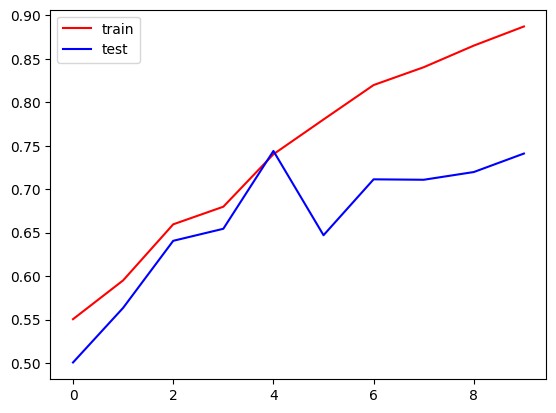

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'test')
plt.legend()
plt.show()

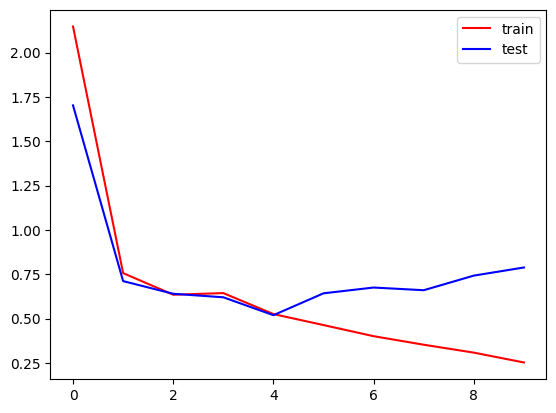

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'test')
plt.legend()
plt.show()